In [2]:
pd.read_csv('clean0.csv')

,State,City,Station ID,Last Update,Latitude,Longitude,PM2.5 Min,PM2.5 Max,PM2.5 Avg,PM2.5 Hourly sub index,...,CO_Min,CO_Max,CO_Avg,CO_Hourly_sub_index,OZONE_Min,OZONE_Max,OZONE_Avg,OZONE_Hourly_sub_index,AQI Value,Predominant_Parameter
0,Andhra Pradesh,Amravati,"Secretariat, Amaravati - APPCB",19-03-2025 19:00:00,16.515083,80.518167,2.0,17.0,9.0,8.0,...,3.0,34.0,18.0,12.0,1.0,26.0,22.0,14.0,23,PM10
1,Andhra Pradesh,Anantpur,"Gulzarpet, Anantapur - APPCB",19-03-2025 19:00:00,14.675886,77.593027,39.0,61.0,51.0,48.0,...,10.0,20.0,20.0,20.0,8.0,39.0,31.0,31.0,54,PM10
2,Andhra Pradesh,Chittor,"Gangineni Cheruvu, Chittoor - APPCB",19-03-2025 19:00:00,13.204880,79.097889,21.0,314.0,88.0,0.0,...,6.0,10.0,6.0,0.0,21.0,43.0,34.0,0.0,88,PM2.5
3,Andhra Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",19-03-2025 19:00:00,14.465052,78.824187,28.0,47.0,38.0,34.0,...,26.0,30.0,30.0,29.0,30.0,30.0,30.0,30.0,40,PM10
4,Andhra Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",19-03-2025 19:00:00,16.987287,81.736318,5.0,19.0,12.0,10.0,...,10.0,32.0,17.0,30.0,6.0,7.0,6.0,6.0,21,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,West Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",19-03-2025 19:00:00,22.499290,88.369170,132.0,260.0,189.0,182.0,...,17.0,43.0,24.0,17.0,18.0,82.0,65.0,30.0,189,PM2.5
457,West Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",19-03-2025 19:00:00,22.627847,88.380669,70.0,96.0,83.0,87.0,...,28.0,40.0,31.0,30.0,24.0,97.0,81.0,45.0,98,PM10
458,West Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",19-03-2025 19:00:00,22.511060,88.351420,51.0,107.0,76.0,100.0,...,20.0,40.0,25.0,20.0,25.0,119.0,86.0,32.0,86,OZONE
459,West Bengal,Kolkata,"Victoria, Kolkata - WBPCB",19-03-2025 19:00:00,22.544808,88.340369,60.0,166.0,103.0,109.0,...,36.0,100.0,54.0,36.0,11.0,81.0,60.0,31.0,117,PM10


In [3]:
import pandas as pd
import math # Needed to check for NaN safely

# --- Configuration ---
input_csv_file = 'clean0.csv'
output_csv_file = 'clean0_categorized_health.csv'
aqi_column = 'AQI Value'
city_column = 'City'
state_column = 'State'

# --- CPCB AQI Categories and Health Implications ---
# Structure: (upper_limit, category_name, health_implication)
# The list is ordered by the upper limit of the AQI range.
aqi_categories_info = [
    (50,  'Good', 'Minimal impact'),
    (100, 'Satisfactory', 'Minor breathing discomfort to sensitive people'),
    (200, 'Moderate', 'Breathing discomfort to people with lung disease such as asthma, and discomfort to people with heart disease, children and older adults'),
    (300, 'Poor', 'Breathing discomfort to most people on prolonged exposure'),
    (400, 'Very Poor', 'Respiratory illness on prolonged exposure'),
    # Use float('inf') for the upper bound of the highest category
    (float('inf'), 'Severe', 'Affects healthy people and seriously impacts those with existing diseases')
]

# --- Function to Categorize AQI ---
def get_aqi_category_and_health(aqi_value):
    """
    Determines the AQI category and corresponding health implication based on CPCB norms.

    Args:
        aqi_value: The AQI value (can be number, string, None, or NaN).

    Returns:
        A tuple containing (category_name, health_implication).
        Returns ('Data Unavailable', 'AQI value not available') if input is None/NaN.
        Returns ('Invalid Data', 'AQI value is not numeric') if input cannot be converted to float.
    """
    # Handle missing or non-numeric data gracefully
    if aqi_value is None or pd.isna(aqi_value):
        return 'Data Unavailable', 'AQI value not available'

    try:
        # Convert to float for comparison, handling potential string inputs
        aqi = float(aqi_value)
    except (ValueError, TypeError):
        # If conversion fails, mark as invalid
        return 'Invalid Data', 'AQI value is not numeric'

    # Iterate through the defined categories
    for upper_limit, category, health_impact in aqi_categories_info:
        # Check if the AQI value falls within the current category's range
        if aqi <= upper_limit:
            return category, health_impact

    # This part should theoretically not be reached if float('inf') is used correctly
    # but serves as a fallback.
    return 'Beyond Severe Range', 'Health alert: everyone may experience more serious health effects'

# --- Main Script Execution ---
if __name__ == "__main__":
    print(f"Attempting to load data from '{input_csv_file}'...")

    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(input_csv_file)
        print("Data loaded successfully.")

        # --- Data Validation ---
        if aqi_column not in df.columns:
            print(f"Error: The required column '{aqi_column}' was not found in the CSV.")
            print(f"Available columns are: {list(df.columns)}")
            exit() # Stop execution if the critical column is missing

        if city_column not in df.columns:
            print(f"Warning: Column '{city_column}' not found. City names may not be fully represented in the summary.")
        if state_column not in df.columns:
             print(f"Warning: Column '{state_column}' not found. State names may not be fully represented in the summary.")


        print(f"Categorizing cities based on '{aqi_column}'...")

        # --- Apply the categorization function ---
        # It's safer to apply the function directly to the original column.
        # The function itself handles non-numeric types and NaNs.
        results = df[aqi_column].apply(get_aqi_category_and_health)

        # Add the results as new columns to the DataFrame
        df['AQI Category'] = results.apply(lambda x: x[0])
        df['Health Implications'] = results.apply(lambda x: x[1])

        print("Categorization complete.")

        # --- Display Sample Results ---
        print("\n--- Sample Data with AQI Categories and Health Implications ---")
        # Select relevant columns for display
        display_columns = [col for col in [state_column, city_column, aqi_column, 'AQI Category', 'Health Implications'] if col in df.columns]
        print(df[display_columns].head(10)) # Show the first 10 rows

        # --- Display Summary ---
        print("\n--- Summary: Number of Locations per AQI Category ---")
        category_counts = df['AQI Category'].value_counts().reset_index()
        category_counts.columns = ['AQI Category', 'Number of Locations']
        print(category_counts)

        # --- Save the updated DataFrame to a new CSV file ---
        try:
            df.to_csv(output_csv_file, index=False)
            print(f"\nSuccessfully saved the categorized data to '{output_csv_file}'")
        except Exception as e:
            print(f"\nError saving results to '{output_csv_file}': {e}")

    except FileNotFoundError:
        print(f"Error: The file '{input_csv_file}' was not found.")
        print("Please make sure the CSV file is in the same directory as the script or provide the full path.")
    except pd.errors.EmptyDataError:
         print(f"Error: The file '{input_csv_file}' is empty.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    print("\nScript finished.")

Attempting to load data from 'clean0.csv'...
Data loaded successfully.
Categorizing cities based on 'AQI Value'...
Categorization complete.

--- Sample Data with AQI Categories and Health Implications ---
            State               City  AQI Value  AQI Category  \
0  Andhra Pradesh           Amravati         23          Good   
1  Andhra Pradesh           Anantpur         54  Satisfactory   
2  Andhra Pradesh            Chittor         88  Satisfactory   
3  Andhra Pradesh             Kadapa         40          Good   
4  Andhra Pradesh  Rajamahendravaram         21          Good   
5  Andhra Pradesh           Tirumala         27          Good   
6  Andhra Pradesh           Tirupati         58  Satisfactory   
7  Andhra Pradesh          Vijaywada         53  Satisfactory   
8  Andhra Pradesh          Vijaywada         74  Satisfactory   
9  Andhra Pradesh          Vijaywada         69  Satisfactory   

                              Health Implications  
0                          

Landscape table image saved as 'aqi_health_statements_table_landscape.png'


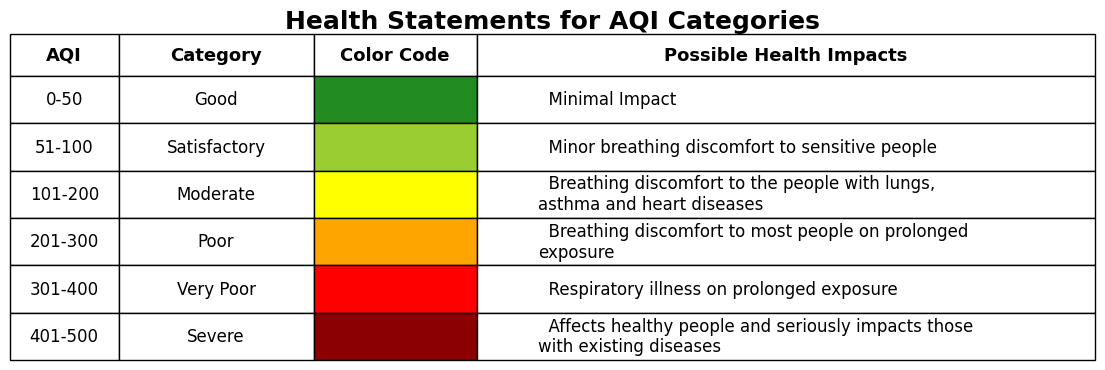

In [8]:
import matplotlib.pyplot as plt
import numpy as np # Not strictly needed for this version

# --- Data for the table ---
column_headers = ["AQI", "Category", "Color Code", "Possible Health Impacts"]

data_text = [
    ["0-50", "Good", "", "Minimal Impact"],
    ["51-100", "Satisfactory", "", "Minor breathing discomfort to sensitive people"],
    # Adjusted newlines for potentially better wrapping in landscape
    ["101-200", "Moderate", "", "Breathing discomfort to the people with lungs,\nasthma and heart diseases"],
    ["201-300", "Poor", "", "Breathing discomfort to most people on prolonged\nexposure"],
    ["301-400", "Very Poor", "", "Respiratory illness on prolonged exposure"],
    ["401-500", "Severe", "", "Affects healthy people and seriously impacts those\nwith existing diseases"]
]

# Corresponding Hex color codes for the "Color Code" column
# ForestGreen, YellowGreen, Yellow, Orange, Red, DarkRed
row_colors = ["#228C22", "#9ACD32", "#FFFF00", "#FFA500", "#FF0000", "#8B0000"]

# --- Create Figure and Axes ---
# Adjust figsize for a clear landscape aspect ratio (Width > Height)
# Increased width and slightly increased height for better text fit
fig, ax = plt.subplots(figsize=(14, 4)) # Example: 14 inches wide, 4 inches tall

# Hide the axes borders, ticks, and labels
ax.axis('off')
ax.axis('tight')

# --- Create the Table ---
# Adjusted column widths slightly - give Category a bit more, take from Impacts
the_table = plt.table(cellText=data_text,
                      colLabels=column_headers,
                      loc='center',         # Position the table in the center
                      cellLoc='center',     # Center text within cells by default
                      colWidths=[0.1, 0.18, 0.15, 0.57]) # Relative widths must sum near 1

# --- Style the Table ---
the_table.auto_set_font_size(False)
the_table.set_fontsize(12) # Slightly increased base font size for landscape

# Style Header Row
for j in range(len(column_headers)):
    cell = the_table[0, j] # Header row is row 0
    cell.set_fontsize(13)  # Slightly larger header font
    cell.set_text_props(weight='bold')
    cell.set_height(0.14) # Adjust height if needed

# Style Data Rows
num_rows = len(data_text)
color_col_index = 2 # Index of the "Color Code" column
impact_col_index = 3 # Index of the "Possible Health Impacts" column

for i in range(num_rows):
    row_index = i + 1 # Data rows start from index 1 (after header)
    for j in range(len(column_headers)):
        cell = the_table[row_index, j]
        cell.set_height(0.16) # Consistent height for data rows

        # Apply specific color to the "Color Code" cell
        if j == color_col_index:
            cell.set_facecolor(row_colors[i])
            # Ensure no text is displayed in the color cell itself
            cell.get_text().set_text('')

        # Left-align text in the "Possible Health Impacts" column
        # Add some padding by prepending spaces (simple method)
        if j == impact_col_index:
             cell.set_text_props(ha='left') # Horizontal alignment = left
             # Add leading spaces for padding - adjust number of spaces as needed
             cell.get_text().set_text("  " + data_text[i][j]) # Prepend spaces

# --- Add Title ---
# Adjust pad maybe slightly less needed with more height
plt.title('Health Statements for AQI Categories', fontweight='bold', fontsize=18, pad=15)

# --- Adjust Layout and Save ---
# fig.tight_layout() # Can sometimes interfere with table positioning, try with/without
plt.subplots_adjust(top=0.85) # Manually adjust top spacing if title overlaps

# Save the figure
output_filename = 'aqi_health_statements_table_landscape.png'
try:
    # Use bbox_inches='tight' to minimize whitespace around the table itself
    plt.savefig(output_filename, dpi=200, bbox_inches='tight', pad_inches=0.3)
    print(f"Landscape table image saved as '{output_filename}'")
except Exception as e:
    print(f"Error saving file: {e}")

# --- Display the plot (optional) ---
# plt.show()